In [1]:
from msmarco.download import minimarco
from time import perf_counter
import numpy as np
import pandas as pd
from msmarco.evaluate import grade_results, judge_queries

minmarco_mrr10 = [0] * 5
REBUILD=False
NUM_QUERIES = 1000
NUM_UNRELS = 10

In [2]:
minim, minim_judgments = minimarco(num_queries=NUM_QUERIES, num_unrels=NUM_UNRELS, rebuild=REBUILD)
minim

,msmarco_id,url,title,body
0,D312959,https://en.wikipedia.org/wiki/Visual_cortex,Visual cortex,"From Wikipedia, the free encyclopedianavigatio..."
1,D140227,http://www.webmd.com/depression/electroconvuls...,Electroconvulsive Therapy (ECT),Electroconvulsive Therapy (ECT)Treatment Overv...
2,D213890,https://en.wikipedia.org/wiki/Cholera,Cholera,"From Wikipedia, the free encyclopedianavigatio..."
3,D1033338,https://answers.yahoo.com/question/index?qid=2...,The ABO blood type system in humans is an exam...,Science & Mathematics Biology The ABO blood ty...
4,D508131,http://www.healthline.com/health/beriberi,What is beriberi?,What is beriberi? Beriberi is a disease caused...
...,...,...,...,...
302324,D2026440,http://faculty.salina.k-state.edu/tim/ossg/Int...,1.5. Basics of How Operating Systems Work ÃÂ¶,1.5. Basics of How Operating Systems Work Â¶1....
1172007,D3464906,http://www.worktruckonline.com/channel/mainten...,Air Brakes or Hydraulic Brakes: That is the Qu...,Air Brakes or Hydraulic Brakes: That is the Qu...
703410,D3056747,http://www.spin.com/2015/09/nirvana-krist-novo...,Nirvanaâs Krist Novoselic Talks Foo Fightersâ ...,Archives \Nirvana’s Krist Novoselic Talks Foo ...
399264,D2101828,http://growingmarijuanatips.com/how-long-does-...,How Long Does it Take to Grow Marijuana,How Long Does it Take to Grow Marijuana In eas...


In [8]:
minim_judgments['grade'] = 1
minim_judgments

,query_id,query,msmarco_id,grade
0,3,another name for the primary visual cortex is,D312959,1
1,5,ect is a treatment that is used for,D140227,1
2,12,rice-water stools are associated with disease...,D213890,1
3,15,the abo blood types are examples of,D1033338,1
4,16,the vitamin that prevents beriberi is,D508131,1
...,...,...,...,...
995,4806,ketamine infusion side effects,D806650,1
996,4810,kirby puckett baseball cards value,D999913,1
997,4811,klinefelter syndrome is an consequence of what...,D732799,1
998,4826,lasa catagories,D1424340,1


In [4]:
from searcharray import SearchArray
from msmarco.tokenizers import snowball_tokenizer

minim['title_snowball'] = SearchArray.index(minim['title'], tokenizer=snowball_tokenizer)
minim['body_snowball'] = SearchArray.index(minim['body'], tokenizer=snowball_tokenizer)

minim

,msmarco_id,url,title,body,title_snowball,body_snowball
0,D312959,https://en.wikipedia.org/wiki/Visual_cortex,Visual cortex,"From Wikipedia, the free encyclopedianavigatio...","Terms({'cortex', 'visual'})","Terms({'anzai', 'no', 'bottom', 'outsid', 'riz..."
1,D140227,http://www.webmd.com/depression/electroconvuls...,Electroconvulsive Therapy (ECT),Electroconvulsive Therapy (ECT)Treatment Overv...,"Terms({'electroconvuls', 'therapi', 'ect'})","Terms({'2', 'caus', 'reliev', 'schizophrenia',..."
2,D213890,https://en.wikipedia.org/wiki/Cholera,Cholera,"From Wikipedia, the free encyclopedianavigatio...",Terms({'cholera'}),"Terms({'no', 'outsid', 'oral', 'anatomist', 'm..."
3,D1033338,https://answers.yahoo.com/question/index?qid=2...,The ABO blood type system in humans is an exam...,Science & Mathematics Biology The ABO blood ty...,"Terms({'is', 'an', 'exampl', 'the', 'blood', '...","Terms({'exampl', 'mba', 'oldest', 'consolid', ..."
4,D508131,http://www.healthline.com/health/beriberi,What is beriberi?,What is beriberi? Beriberi is a disease caused...,"Terms({'is', 'beriberi', 'what'})","Terms({'caus', 'revers', 'veri', 'sprout', 'br..."
...,...,...,...,...,...,...
302324,D2026440,http://faculty.salina.k-state.edu/tim/ossg/Int...,1.5. Basics of How Operating Systems Work ÃÂ¶,1.5. Basics of How Operating Systems Work Â¶1....,"Terms({'ãâ¶', 'work', 'basic', 'system', 'oper...","Terms({'here', 'as', 'handl', 'toward', 'from'..."
1172007,D3464906,http://www.worktruckonline.com/channel/mainten...,Air Brakes or Hydraulic Brakes: That is the Qu...,Air Brakes or Hydraulic Brakes: That is the Qu...,"Terms({'air', 'is', 'that', 'the', 'hydraul', ...","Terms({'bottom', 'piston', 'leak', 'cost', 'po..."
703410,D3056747,http://www.spin.com/2015/09/nirvana-krist-novo...,Nirvanaâs Krist Novoselic Talks Foo Fightersâ ...,Archives \Nirvana’s Krist Novoselic Talks Foo ...,"Terms({'talk', 'krist', 'foo', 'and', 'miss', ...","Terms({'cl', 'here', 'as', 'jr', 'bob', 'croat..."
399264,D2101828,http://growingmarijuanatips.com/how-long-does-...,How Long Does it Take to Grow Marijuana,How Long Does it Take to Grow Marijuana In eas...,"Terms({'it', 'long', 'to', 'marijuana', 'grow'...","Terms({'big', 'beginn', 'than', 'as', 'smokabl..."


In [5]:
def or_query_search(corpus, fields, query, query_id=None, n=10):
    if not isinstance(fields, list):
        fields = [fields]
    start = perf_counter()
    scored = np.zeros(len(corpus))
    for field in fields:
        boost = 1.0
        if '^' in field:
            field, boost = field.split('^')
            boost = float(boost)
        tokenizer = corpus[field].array.tokenizer
        tokens = tokenizer(query)
        scored += (np.sum([corpus[field].array.score(token) for token in tokens], axis=0) * boost)
    took = perf_counter() - start
    
    top_n_idx = np.argsort(scored)[::-1][:n]
    scores = scored[top_n_idx]
    top_n_idx, scores

    top_n = corpus[['title', 'msmarco_id']].iloc[top_n_idx]
    top_n['scores'] = scores
    top_n['query'] = query
    top_n['query_id'] = query_id
    top_n['took'] = took
    top_n['rank'] = np.arange(n) + 1
    return top_n

or_query_search(corpus=minim, fields="title_snowball", query="cheese inside")

,title,msmarco_id,scores,query,query_id,took,rank
11795,History of Cheese,D2499064,5.215492,cheese inside,None,0.000645,1
2860715,Join Law Insider,D3255947,3.950340,cheese inside,None,0.000645,2
3104372,Cloverhill Cheese Danish,D2356374,3.655829,cheese inside,None,0.000645,3
2747145,Calories in Manchego Cheese,D1546812,3.340552,cheese inside,None,0.000645,4
446609,Potato and Cheese Soup,D2694173,3.340552,cheese inside,None,0.000645,5
1482028,"SAUSAGE, EGG & CHEESE SANDWICH",D886045,3.340552,cheese inside,None,0.000645,6
2362278,Classic Plain Cream Cheese,D938562,3.340552,cheese inside,None,0.000645,7
1756013,Inside the war on coal,D2979027,3.323083,cheese inside,None,0.000645,8
234765,Bill Gates House & Inside Pictures,D2014807,3.323083,cheese inside,None,0.000645,9
1213122,Huge 'Ocean' Discovered Inside Earth,D3362276,3.323083,cheese inside,None,0.000645,10


## Title search

Just search title w/ BM25

In [6]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='title_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
0,Visual cortex,D312959,9.712521,another name for the primary visual cortex is,3,0.002037,1
2650240,What is another word for education?,D892523,5.417593,another name for the primary visual cortex is,3,0.002037,2
100595,Another word for time,D3094958,5.030671,another name for the primary visual cortex is,3,0.002037,3
1751759,What is another word for set in motion?,D2459021,4.722834,another name for the primary visual cortex is,3,0.002037,4
2495797,What is the origin of the name for planet merc...,D2520132,4.529799,another name for the primary visual cortex is,3,0.002037,5
...,...,...,...,...,...,...,...
853680,Final Stages of Pregnancy,D2499268,3.306948,lgps definition final salary,4829,0.000812,6
1394757,Medical Interpreter Salaries,D3431606,3.013242,lgps definition final salary,4829,0.000812,7
1214435,Human Service Salaries,D88767,3.013242,lgps definition final salary,4829,0.000812,8
2839686,NFL Salary Rankings,D1417657,3.013242,lgps definition final salary,4829,0.000812,9


In [9]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[0] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[0]

0.5488305555555555

## Body search

In [10]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='body_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
2089973,Types of Dementia,D36260,9.191588,another name for the primary visual cortex is,3,0.004150,1
672800,Cerebrum,D15306,8.644365,another name for the primary visual cortex is,3,0.004150,2
945,Imaging of additional Spinal Conditions,D1318655,8.311618,another name for the primary visual cortex is,3,0.004150,3
2333361,"Chapter 11,12,13",D522822,8.272884,another name for the primary visual cortex is,3,0.004150,4
63,Information processing,D861951,7.921384,another name for the primary visual cortex is,3,0.004150,5
...,...,...,...,...,...,...,...
78124,How 401 (k) Contributions Affect Your Paycheck,D2745286,4.738739,lgps definition final salary,4829,0.000396,6
1163528,Packers vs. Seahawks 2015 final score: 3 thing...,D3402846,4.694958,lgps definition final salary,4829,0.000396,7
3071951,Convert kilogram to pounds - Conversion of Mea...,D74570,4.657152,lgps definition final salary,4829,0.000396,8
1713417,employer,D591964,4.632538,lgps definition final salary,4829,0.000396,9


In [11]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[1] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[1]

0.529631746031746

## Body plus title

Body and title together

In [12]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
0,Visual cortex,D312959,12.146753,another name for the primary visual cortex is,3,0.005321,1
2089973,Types of Dementia,D36260,9.191588,another name for the primary visual cortex is,3,0.005321,2
672800,Cerebrum,D15306,8.644365,another name for the primary visual cortex is,3,0.005321,3
945,Imaging of additional Spinal Conditions,D1318655,8.311618,another name for the primary visual cortex is,3,0.005321,4
2333361,"Chapter 11,12,13",D522822,8.272884,another name for the primary visual cortex is,3,0.005321,5
...,...,...,...,...,...,...,...
42,MSL Salaries,D3049251,6.118538,lgps definition final salary,4829,0.000434,6
2418985,Construction Project Assistant Salary,D2262960,5.954724,lgps definition final salary,4829,0.000434,7
959,The Average Beginning Teacher Salaries,D37288,5.936331,lgps definition final salary,4829,0.000434,8
474406,California Nursing Assistant Salaries,D518124,5.912796,lgps definition final salary,4829,0.000434,9


In [13]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[2] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[2]

0.7080230158730157

## Weigh body * 10

In [14]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball^10', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[3] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[3]

0.5936599206349206

## Weigh title * 10

In [15]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball^10'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[4] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[4]

0.5825150793650794

## Compare MSMarco -> MiniMarco Sample

In [39]:
labels = np.asarray(['title', 'body', 'title body', 'title^10 body', 'body^10 title'])
msmarco_mrr10 = np.asarray([0.1914920634920635, 0.22227182539682536, 0.26367896825396825, 0.2569694444444444, 0.20999087301587302])
# [0.1879472222222222,
#  0.21533611111111112,
#  0.2658829365079365,
#  0.24670238095238095,
#  0.21640238095238096]
minimarco_mrr10 = np.asarray(minmarco_mrr10)

In [36]:
msmarco_sorted_idx = msmarco_mrr100.argsort()
labels[msmarco_sorted_idx]

array(['title', 'body^10 title', 'body', 'title^10 body', 'title body'],
      dtype='<U13')

In [33]:
msmarco_mrr100_sorted = msmarco_mrr100[msmarco_sorted_idx]
minimarco_mrr10_sorted = minimarco_mrr10[msmarco_sorted_idx]

In [34]:
from scipy.stats import spearmanr

spearmanr(msmarco_mrr100_sorted, minimarco_mrr10_sorted)

SignificanceResult(statistic=0.7, pvalue=0.18812040437418728)

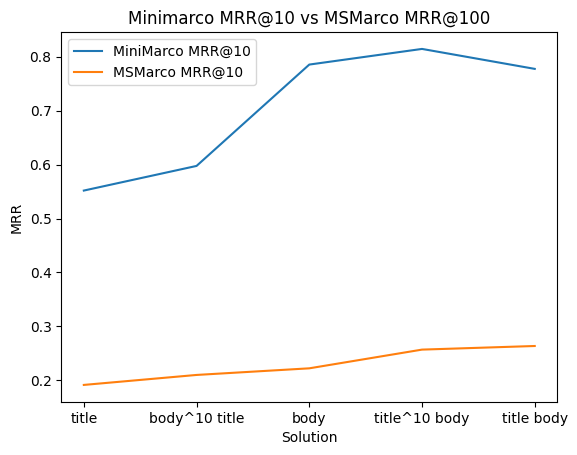

In [38]:
import matplotlib.pyplot as plt


x = np.arange(len(minimarco_mrr10_sorted))
plt.plot(x, minimarco_mrr10_sorted, label='MiniMarco MRR@10')
plt.plot(x, msmarco_mrr100_sorted, label='MSMarco MRR@10')

plt.title('Minimarco MRR@10 vs MSMarco MRR@100')
plt.xlabel('Solution')
plt.ylabel('MRR')
plt.xticks(x, labels[msmarco_sorted_idx])
plt.legend()
